## Import the Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset : 

In [3]:
df = pd.read_csv(r"D:\Amar study\On the Way\ML\HandsOnProjects\HeartDiseaseDetection\heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dataset Analysis :

In [6]:
count = df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64


<AxesSubplot:>

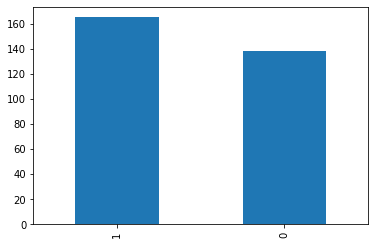

In [8]:
print(count)
count.plot(kind = "bar")

In [9]:
NoDisease=len(df[df.target==0])
Disease=len(df[df.target==1])

print("No Disease : " + str(NoDisease))
print("Disease    : " + str(Disease))

No Disease : 138
Disease    : 165


We infer from the dataset that
- 138 patients don't have heart disease.
- 165 patients have heart disease.

Text(0.5, 0, 'sex(0=female, 1 = male)')

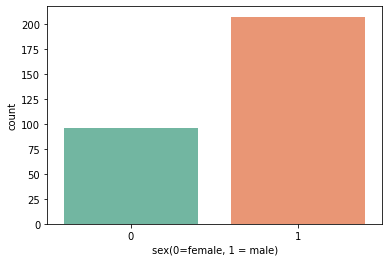

In [10]:
sns.countplot(x="sex",data=df,palette="Set2")
plt.xlabel("sex(0=female, 1 = male)")

We infer from the above plot that
- 96 are female patients
- 207 are mail patiemts

## Applying Machine learning techniques : 

### Logistic Regression :

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,13].values

In [13]:
lr=LogisticRegression()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
lr.fit(x_train,y_train)

c:\Users\sinha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=lr.predict(x_test)

In [17]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

### Confusion Matrix :

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [23]:
accuracy=(22+30)/(22+5+4+30)
print(accuracy*100)

85.24590163934425


### Decision Tree : 

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 78.69%


### Random Forest : 

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 85.25%


### Random Forest algorithm should be used from the above algorithms.